# Chap 6. Multinomial logistic regression

## 1. Understaing multi class classification

<img src="https://utkuufuk.github.io/2018/06/03/one-vs-all-classification/one-vs-all.png" alt="" title="" />

- binary classification은 상단 왼쪽 그림과 같이 두 카테고리를 구분하는 선을 찾는 것이라면, multi class classification은 상단 우측 그림과 같이 여러개의 카테고리를 구분하는 선을 찾는 것이다.

<img src="https://mrmint.fr/wp-content/uploads/2017/09/one-vs-all-classification.png" alt="" title="" />

- multi class classification은 아래 그림과 같이 binary classification을 여러번 거쳐서 구현할 수 있다.
  - class 1 or not = Ha(x)
  - class 2 or not = Hb(x)
  - class 3 or not = Hc(x)
  
### 2. Multinomial classification  
- 3개의 독립된 binary classification으로 구현할수도 있으나, 아래와 같이 행렬을 이용하여 하나의 벡터로 처리할수 있다.

\begin{equation*}
\begin{bmatrix}
w_{a1} & w_{a2} & w_{a3} \\
w_{b1} & w_{a2} & w_{a3} \\
w_{c1} & w_{a2} & w_{a3} \\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
\end{bmatrix} =
\begin{bmatrix}
w_{a1}x_1 + w_{a2}x_2 + w_{a3}x_3 \\
w_{b1}x_1 + w_{b2}x_2 + w_{b3}x_3 \\
w_{c1}x_1 + w_{c2}x_2 + w_{c3}x_3 \\
\end{bmatrix} =
\begin{bmatrix}
\hat{Y_a} & =Ha(x) \\
\hat{Y_b} & =Hb(x) \\
\hat{Y_c} & =Hc(x) \\
\end{bmatrix}
\end{equation*}

- 각각의 y hat은 실수를 갖는다. 그러므로 0과 1.0 사이의 값으로 처리하기 위해 sigmoid 함수도 각각 필요하다. 이것을 한번에 효율적으로 처리하기 위해 만들어진것이 softmax 함수이다.

### 2.1. Hypothesis (Softmax)
- softmax 함수는 N개의 입력을 softmax에 넣으면 각 입력에 대한 확률을 출력해준다.
- 출력의 확률의 총합은 1.0이다. 즉 각 입력에 대한 sigmoid 함수를 한번에 처리해준다.

<img src="https://i.ytimg.com/vi/lvNdl7yg4Pg/maxresdefault.jpg" alt="" title="" />

- softmax로 출력된 확률을 가지고 One-Hot Encoding(tf.argmax API)을 통하여 하나의 카테고리를 선택하도록 할 수 있다.

### 2.2. Cost function (Cross Entropy)

- 아래 그림에서 S(Y)는 예측값으로 Y hat을 의미하며, L은 label로 Y 정답을 의미한다.
- cost function은 예측값 Y hat(S)과 Y(L)의 차이며, cost 값을 구하기위해 cross entropy를 사용한다.

<img src="https://irenelizihui.files.wordpress.com/2016/01/mn3.png" alt="" title="" />

  - 아래 함수가 cross enropy 함수이다. D는 Distance, S는 Softmax, L는 Label을 의미한다.

\begin{equation*}
D(S, L) = -\sum_{i} L_i \log(S_i)
\end{equation*}

  - 이 함수가 왜 적합한 cost 함수인지 증명하면 아래 설명과 같다.
  - cross entropy 함수는 아래와 같이 다시 표현할수 있다.

\begin{equation*}
D(S, L) = -\sum_{i} L_i \log(S_i) = \sum_{i}(Li) \text{◎} (-\log(\hat{Y_i}))
\end{equation*}

  - Y hat은 softmax의 출력값으로 0 ~ 1.0의 값을 갖는다.
  - -log 함수는 아래와 같은 그래프와 갖는다. Y hat의 값이 1.0에 가까우면 -log(Y hat)은 0에 수렴하고, Y hat의 값이 0에 가까우면 -log(Y hat)은 무한대에 수렴한다.

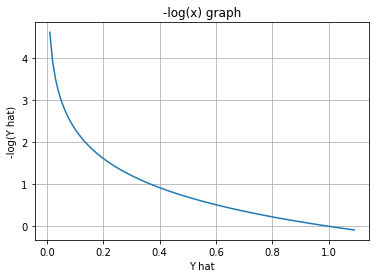

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

z = np.arange(0.01, 1.1, 0.01)
gz = -np.log(z)
plt.plot(z, gz)

plt.xlabel('Y hat')
plt.ylabel('-log(Y hat)')
plt.title('-log(x) graph')
plt.grid(True)
plt.show()

  - 설명을 위해 카테고리가 A, B 두가지 label이 있다고 가정하고
  - 첫째, Label(실측값)이 B라면, Hypothesis는 A혹은 B라고 예측을 할것이다. 이때의 Cost를 각각 살펴보면...

\begin{equation*}
Y = L = 
\begin{bmatrix}
0 & (A)\\
1 & (B)\\
\end{bmatrix} = B
\end{equation*}

  - 예측이 참일 경우 아래와 같이 cost가 0에 수렴한다. "◎"은 element wise multiplication (행렬의 요소별 곱셈)을 의미한다.
    
\begin{equation*}
\hat Y = 
\begin{bmatrix}
0 & (A)\\
1 & (B)\\
\end{bmatrix} = B(TRUE),
\end{equation*}
\begin{equation*}
\sum_{i}
\begin{bmatrix}
0\\
1\\
\end{bmatrix} \text{◎} - \log
\begin{bmatrix}
0\\
1\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}  \text{◎}
\begin{bmatrix}
\infty\\
0\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
0\\
0\\
\end{bmatrix} => 0
\end{equation*}
    
  - 예측이 거짓일 경우 아래와 같이 cost는 무한대에 수렴한다.
    
\begin{equation*}
\hat Y = 
\begin{bmatrix}
1 & (A)\\
0 & (B)\\
\end{bmatrix} = A(FALSE),
\end{equation*}
\begin{equation*}
\sum_{i}
\begin{bmatrix}
0\\
1\\
\end{bmatrix} \text{◎} - \log
\begin{bmatrix}
1\\
0\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
0\\
1\\
\end{bmatrix}  \text{◎}
\begin{bmatrix}
0\\
\infty\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
0\\
\infty\\
\end{bmatrix} => \infty
\end{equation*}

  - 둘째, Label(실측값)이 A라면, Hypothesis는 A혹은 B라고 예측을 할것이다. 이때의 Cost를 각각 살펴보면...

\begin{equation*}
Y = L = 
\begin{bmatrix}
1 & (A)\\
0 & (B)\\
\end{bmatrix} = A
\end{equation*}

  - 예측이 참일 경우 아래와 같이 cost가 0에 수렴한다.
    
\begin{equation*}
\hat Y = 
\begin{bmatrix}
1 & (A)\\
0 & (B)\\
\end{bmatrix} = A(TRUE),
\end{equation*}
\begin{equation*}
\sum_{i}
\begin{bmatrix}
1\\
0\\
\end{bmatrix} \text{◎} - \log
\begin{bmatrix}
1\\
0\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}  \text{◎}
\begin{bmatrix}
0\\
\infty\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
0\\
0\\
\end{bmatrix} => 0
\end{equation*}
    
  - 예측이 거짓일 경우 아래와 같이 cost는 무한대에 수렴한다.
    
\begin{equation*}
\hat Y = 
\begin{bmatrix}
0 & (A)\\
1 & (B)\\
\end{bmatrix} = B(FALSE),
\end{equation*}
\begin{equation*}
\sum_{i}
\begin{bmatrix}
1\\
0\\
\end{bmatrix} \text{◎} - \log
\begin{bmatrix}
0\\
1\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
1\\
0\\
\end{bmatrix}  \text{◎}
\begin{bmatrix}
\infty\\
0\\
\end{bmatrix} = 
\sum_{i}
\begin{bmatrix}
\infty\\
0\\
\end{bmatrix} => \infty
\end{equation*}
  
  - 결과적으로 cost function이 잘 동작함을 확인할수 있다.

- Traning set이 있을 경우의 Multinomial regression의 Cost function을 정의하면 아래와 같다.

\begin{equation*}
loss =\frac{1}{m}\sum_{i}^{m}D(S(WX_i + b), L_i)
\end{equation*}

  - loss는 cost
  - D는 Distance
  - S는 Softmax
  - WX+b는 Hypothesis(예측값)
  - L은 Label (결과값)


### 2.3. Logistic cost VS Cross entropy
- Logistic regression의 cost 함수는 아래와 같고

\begin{equation*}
c(H(x),y)=-ylog(H(x)) - (1-y)log(1-H(x))
\end{equation*}

- Multinomial logistic regression의 cost 함수 (cross entropy)는 아래와 같다.

\begin{equation*}
D(S, L) = -\sum_{i} L_i \log(S_i)
\end{equation*}

- 두 cost 함수는 사실 같은 의미이다. Logistic regression 에서는 두개의 카테고리로 분류를 하기 때문에 cost 함수의 수식이 위와같이 나왔고, Multinomial logistic regression 에서는 여러개의 카테고리를 분류를 하기때문에 위와 같은식이 나왔다. 위 2.2 설명에서 A, B 두개의 카테고리를 예로 증명을 하였기 때문에 사실상 Multinomial logistic regression의 cost 함수를 logistic regression에 적용해도 된다.

- Logistic(binary) classification을 행렬로 묶으면 Multinomial classification이 된다.

### 2.4. Minimize cost (Gradient descent algorithm)

- 최소화를 위한 Cost 함수인 cross entropy의 미분식은 생략되었으며 아래 그림으로 설명을 대신한다.

<img src="https://i.ytimg.com/vi/hMLUgM6kTp8/maxresdefault.jpg" alt="" title="" />

<img src="https://i.ytimg.com/vi/b4Vyma9wPHo/maxresdefault.jpg" alt="" title="" />


## 3. Lab1: Softmax classifier example
- x_data는 4개의 feature와 8개의 instance로 구성된 행렬이다.
- y_data는 3개의 label과 8개의 instance로 구성된 행렬인데 one hot encoding을 해야하기 떄문에 세개중 한개의 label에 해당하는 index값에 1로 표기되었다. (byte mask라고 이해하면됨)
- Weight은 X가 8개의 instance, 4개의 feature를 가지므로 [8, 4], Y가 8개의 instance, 3개의 label을 가지므로 [8, 3]이 되므로 4강의 행렬 곱셈 설명에 따라 [4, 3]이 된다.
  - X ＊ W = Y 에서 [8, 4] ＊ [?, ?] = [8, 3]
- logits, hypothesis, cost는 위 2.2. cross entropy에서 설명된 그림대로 tensorflow API를 사용하여 코딩 되었다.

In [5]:
################################################################################
# lab6-1 : Softmax Classifier
# 
################################################################################
import tensorflow as tf
tf.set_random_seed(777) # for reproducibility

# [x1, x2, x3, x4], 4 feature x 8 instance matrix
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]

# [label0, label1, label2], One-Hot encoding, 3 label x 8 instance matrix
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]          

# Placeholder for a tensor that will be always fed
X = tf.placeholder(tf.float32, shape=[None, 4]) # 4 features
Y = tf.placeholder(tf.float32, shape=[None, 3]) # 3 labels
nb_classes = 3 # 3 labels, 3 classes

# Model parameters
# Calculate weight: X*W=Y -> [8, 4] * [?,?] = [8, 3] -> [4, 3]
W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss function
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# launch the graph in a session
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 5000 == 0:
            print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))

    # Testing & One-hot encoding
    print("------------------------------------------------------------------")
    a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
    print("case a:", a, "\tOne hot label:", sess.run(tf.argmax(a, 1)))

    print("------------------------------------------------------------------")
    b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
    print("case b: ", b, "\tOne hot label:", sess.run(tf.argmax(b, 1)))

    print("------------------------------------------------------------------")
    c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
    print("case c: ", c, "\tOne hot label:", sess.run(tf.argmax(c, 1)))

    print("------------------------------------------------------------------")
    tot = sess.run(hypothesis, feed_dict={
        X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
    print("case tot: ", tot, "\tOne hot label:", sess.run(tf.argmax(tot, 1)))

0 1.8781685
5000 0.07611559
10000 0.039919432
------------------------------------------------------------------
case a: [[1.3999233e-06 9.9999857e-01 3.4802923e-08]] 	One hot label: [1]
------------------------------------------------------------------
case b:  [[9.9512935e-01 4.7354838e-03 1.3512206e-04]] 	One hot label: [0]
------------------------------------------------------------------
case c:  [[8.359102e-16 5.875436e-07 9.999994e-01]] 	One hot label: [2]
------------------------------------------------------------------
case tot:  [[1.3999233e-06 9.9999857e-01 3.4802923e-08]
 [9.9512935e-01 4.7354838e-03 1.3512206e-04]
 [8.3591019e-16 5.8754358e-07 9.9999940e-01]] 	One hot label: [1 0 2]


- 학습을 통하여 cost가 0에 수렴되었으므로 학습이 잘된것을 판단할수 있따.

- 학습후 학습이 완료된 hypothesis에 임의의 X 데이터를 feed 시키면 softmax를 통과한 확률을 리턴해준다. (왜냐하면 당연히 hypothesis에 softmax함수를 사용했으므로)이를 출력해보면 3 label중 한가지만이 1.0에 가깝고 나뭐지는 0에 가까운 확률값을 볼수 있다. 또한 argmax 함수를 통하여 1.0에 가까운 label의 index 값을 리턴받을수 있다.

- 동시에 여러개의 X 값을 feed로 학습된 hypothesis를 기반으로 세션을 실행하여 y hat, 즉 예측 값을 확인해볼수 있다.


## 4. Lab2: Fancy softmax classifier example
- Lab1에서 cost 함수를 cross entropy를 아래와 같이 조금은 복잡한 연산의 3줄로 구현하였다.
  - logits = tf.matmul(X, W) + b
  - hypothesis = tf.nn.softmax(logits)
  - cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

- 위 cost 함수는 아래 tensorflow API로 fancy하게(?) 대체할 수 있다.
  - logits = tf.matmul(X, W) + b
  - cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
    labels=Y_one_hot)
  - cost = tf.reduce_mean(cost_i)

- data-04-zoo.cvs는 동물의 16가지 특징에 따라 동물을 7종으로 분류한 데이터이다.

- 7종에 해당하는 Y 데이터는 0~6 값을 갖는데 이것을 가지고 cross entropy 함수에 입력을 시키기 위해서는 one hot encoding 데이터로 변경해야 한다. 그래서 Y_one_hot은 tf.one_hot(Y, nc_blasses)함수를 통하여 생성되었다.

- 그러나 tf.one_hot 함수를 통하여 반환된 shape은 rank(차원)이 1차원 늘어난다. 이에 따라 reshape을 하여 차원을 수정해야한다. 그래서 tf.reshape(Y_one_hot, [-1, nb_classes])를 사용하여 처리한것이다. 첫번째 파라미터 Y_one_hot은 입력 데이터이고, 두번째 파라미터는 reshape을 할 출력 데이의 shape을 넣어주어야 한다. [-1, nb_classes]에서 -1은 모든 인스턴스를 의미하고, nb_classes 즉 종의 수를 의미한다.

- prediction은 학습된 hypothesis를 통해 예측된 확률을 argmax를 통해 one hot encoding된 동물의 종에 해당하는 index 값을 받는다. tf.argmax(hypothesis, 1)에서 1은 hypothesis에서 1개의 최고값을 고르라는 의미이다.

- correct_prediction은 예측된 동물의 종에 해당하는 index값과 Y_one_hot의 argmax 값인 실제 동물의 종의 index 값을 비교하여 참과 거짓 값을 받는다.

- accuracy는 correct_prediction 값을 float32로 캐스팅하여 0~1.0을 받고, 평균을 내어 저장한다. 즉 학습의 진행 정도에 따른 정확도를 확인하기 위해 사용되었다.

- y_data.flatten()은 [[1], [0]]과 같은 데이터를 [1, 0]으로 shpae을 납작하게 변환시킨다는 의미이다.

- for p, y in zip(pred, y_data.flatten())은 pred 리스트와 y_data.flatten() 두가지 리스트를 지퍼처럼 하나로 묶듯이 두 리스트의 요소를 각각 p, y로 반환시키라는 의미이다.

In [12]:
################################################################################
# lab6-2 : Fancy Softmax Classifier
#          cross_entropy, one_hot, reshape
################################################################################
import tensorflow as tf
import numpy as np

# for reproducibility
tf.set_random_seed(777) 

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

# print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6

# Predicting animal type based on various features
X = tf.placeholder(tf.float32, shape=[None, 16])
Y = tf.placeholder(tf.int32, shape=[None, 1])  # 0 ~ 6

# One hot
Y_one_hot = tf.one_hot(Y, nb_classes)
print("one_hot:\n", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("reshape one_hot:\n", Y_one_hot)

# Model parameters
W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
    labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Prediction    
prediction = tf.argmax(hypothesis, 1) # probabilities to labels, 0 ~ 6
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(2001):
        sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={
                X: x_data, Y: y_data})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(
                step, loss, acc))

    # Let's see if we can predict
    pred = sess.run(prediction, feed_dict={X: x_data})
    # y_data: (N,1) = flatten => (N, ) matches pred.shape
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] \tPrediction: {} \tOrigin Y: {}".format(p == int(y), p, int(y)))


one_hot:
 Tensor("one_hot_6:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot:
 Tensor("Reshape_6:0", shape=(?, 7), dtype=float32)
Step:     0	Loss: 3.396	Acc: 16.83%
Step:  1000	Loss: 0.111	Acc: 99.01%
Step:  2000	Loss: 0.058	Acc: 100.00%
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 3 	Origin Y: 3
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 3 	Origin Y: 3
[True] 	Prediction: 3 	Origin Y: 3
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 1 	Origin Y: 1
[True] 	Prediction: 3 	Origin Y: 3
[True] 	Prediction: 6 	Origin Y: 6
[True] 	Prediction: 6 	Origin Y: 6
[True] 	Prediction: 6 	Origin Y: 6
[True] 	Prediction: 1 	Origin Y: 1
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 3 	Origin Y: 3
[True] 	Prediction: 0 	Origin Y: 0
[True] 	Prediction: 1 	Origin Y: 1
[True] 	Prediction: 1 	

- one_shot을 통해 생성된 3차원의 데이터가 reshpae 후 2차원의 데이터로 변경된것을 확인할수 있다.

- 학습을 거듭할수록 Cost가 0에 수렴하며, Accuracy가 100% 까지 상승되는 것을 확인할 수 있다.

- 학습 종료후 예측을 잘하는지 확인을 하기위해 prediction에 x_data를 주고 세션을 실행시킨 결과 학습시 Accuracy가 100%로 나온것과 같이 모든 x_data에 대해 예측을 정확하게 하는것을 확인할수 있다.